In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\hildi\Documents\Stanford\mypackages\Julia\SawyerEliassenSolver\examples\barotropic_niws`


In [2]:
using PProf
using HDF5
using Statistics
using Plots
using LaTeXStrings

In [3]:
const LX = 1000.
const LZ = 1.
const Π = 100.
k1 = 2*π/LX 
m1 = 5*π/LZ 
a1 = 1.
k2 = 10*π/LX 
m2 = π/LZ
a2 = 1. /2

ω(k,m) = sqrt((m^2 + k^2*Π^2)/(k^2 + m^2))
ω1 = ω(k1,m1)
ω2 = ω(k2,m2)

u1(x,z) = @. sin(k1*x)*cos(m1*z')
v1(x,z) = @. -1/ω1*sin(k1*x)*cos(m1*z')
u2(x,z) = @. 1/2*sin(k2*x)*cos(m2*z')
v2(x,z) = @. -1/ω2*1/2*sin(k2*x)*cos(m2*z')



v2 (generic function with 1 method)

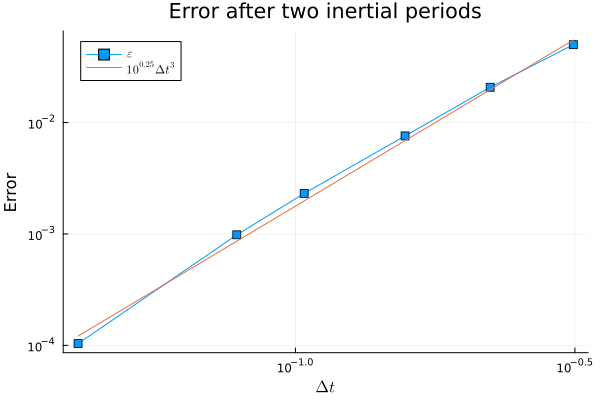

In [4]:
h5open("barotropic_niws.h5","r") do f 
    epsilon = Vector{Vector{Float64}}(undef,0)
    ts = Vector{Vector{Float64}}(undef,0)
    two_ip_error = Vector{Float64}(undef,0)
    Δt = Vector{Float64}(undef,0)

    for grp in f
        t = reshape(read(grp,"t"),1,1,:)

        x = read(grp,"x")
        z = read(grp,"z")
        
        U1 = u1(x,z)
        U2 = u2(x,z)
        u = read(grp,"u")

        error = @. (u - (U1*cos(ω1*t) + U2*cos(ω2*t)))^2

        V1 = v1(x,z)
        V2 = v2(x,z)
        v = read(grp,"v")

        @. error += (v - (V1*sin(ω1*t) + V2*sin(ω2*t)))^2
        new_epsilon = mean(sqrt,error,dims=[1,2])

        push!(epsilon,reshape(new_epsilon,:))
        push!(ts,reshape(t,:))

        _,ii = findmin(@. abs(t - 4*π))
        push!(two_ip_error,new_epsilon[ii])
        push!(Δt,parse(Float64,HDF5.name(grp)[2:end])*π)
        
    end

    #plot(ts,epsilon,yscale=:log10)
    plot(Δt,two_ip_error;xscale=:log10,yscale=:log10,m=:square,label=L"$\epsilon$",xlabel=L"$\Delta t$",ylabel="Error")
    plot!(Δt,@. 10^(0.25)*Δt^3;label=L"$10^{0.25}\Delta t^3$")
    plot!(;title="Error after two inertial periods")
end        
        




In [6]:
const PROFILING_FILEPATH = Base.Filesystem.joinpath(@__DIR__,"barotropic_niws.profile.pb.gz")
const ALLOCS_FILEPATH = Base.Filesystem.joinpath(@__DIR__,"barotropic_niws.allocs.pb.gz")

"c:\\Users\\hildi\\Documents\\Stanford\\mypackages\\Julia\\SawyerEliassenSolver\\examples\\barotropic_niws\\barotropic_niws.allocs.pb.gz"

In [11]:
PProf.refresh(file=PROFILING_FILEPATH)

Process(`'C:\Users\hildi\.julia\artifacts\369324d17493886bdc0dbbf5823ae067a7946ef9\bin\pprof.exe' -http=localhost:57599 -relative_percentages 'c:\Users\hildi\Documents\Stanford\mypackages\Julia\SawyerEliassenSolver\examples\barotropic_niws\barotropic_niws.profile.pb.gz'`, ProcessRunning)

In [10]:
PProf.refresh(file=ALLOCS_FILEPATH)

Process(`'C:\Users\hildi\.julia\artifacts\369324d17493886bdc0dbbf5823ae067a7946ef9\bin\pprof.exe' -http=localhost:57599 -relative_percentages 'c:\Users\hildi\Documents\Stanford\mypackages\Julia\SawyerEliassenSolver\examples\barotropic_niws\barotropic_niws.allocs.pb.gz'`, ProcessRunning)